In [1]:
#load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv('/content/exports.csv')

In [3]:
df.head()

,Month,Product,Production (Mn.Kg/Nuts),Exports (US Mn)
0,Jan-15,Tea,23.3,113.5
1,Jan-15,Rubber,10.8,2.4
2,Jan-15,Coconut,232.5,19.2
3,Feb-15,Tea,25.5,108.4
4,Feb-15,Rubber,9.5,2.5


In [4]:
#get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    360 non-null    object 
 1   Product                  360 non-null    object 
 2   Production (Mn.Kg/Nuts)  360 non-null    float64
 3   Exports (US Mn)          360 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.4+ KB


In [5]:
#get summary statistics
df.describe()

,Production (Mn.Kg/Nuts),Exports (US Mn)
count,360.000000,360.000000
mean,92.613222,48.433139
std,111.296987,47.394337
min,3.400000,1.100000
25%,6.890000,3.200000
50%,23.400000,30.470000
75%,229.325000,104.750000
max,303.500000,143.010000


In [6]:
#get data types
df.dtypes

,0
Month,object
Product,object
Production (Mn.Kg/Nuts),float64
Exports (US Mn),float64


In [7]:
#check for missing values
df.isnull().sum()

,0
Month,0
Product,0
Production (Mn.Kg/Nuts),0
Exports (US Mn),0


In [8]:
#check for outliers in numerical data
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column {col} has {len(outliers)} outliers")

Column Production (Mn.Kg/Nuts) has 0 outliers
Column Exports (US Mn) has 0 outliers


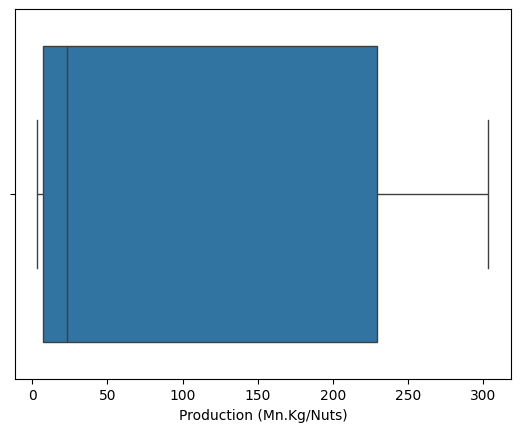

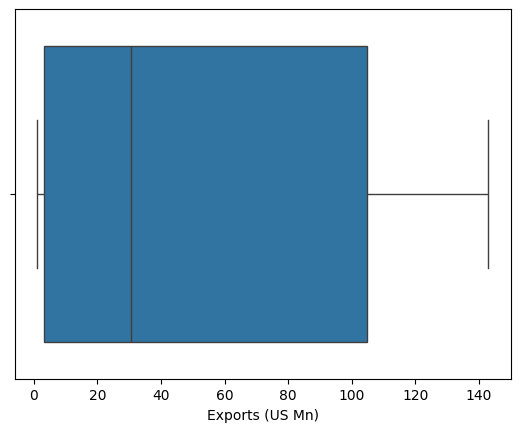

In [9]:
#check for outliers using boxplot
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()

In [10]:
# Convert to datetime
df['Month_Parsed'] = pd.to_datetime(df['Month'], format='%b-%y', errors='coerce')

In [11]:
# Extract full month name and 4-digit year
df['Month'] = df['Month_Parsed'].dt.month_name()
df['Year'] = df['Month_Parsed'].dt.year

In [12]:
#drop Month and Month_Parsed columns
df.drop(['Month', 'Month_Parsed'], axis=1, inplace=True)

In [13]:
#Final dataset
df.head()

,Product,Production (Mn.Kg/Nuts),Exports (US Mn),Year
0,Tea,23.3,113.5,2015
1,Rubber,10.8,2.4,2015
2,Coconut,232.5,19.2,2015
3,Tea,25.5,108.4,2015
4,Rubber,9.5,2.5,2015


In [14]:
#save the final dataset as a new csv file
cleaned_exports = df.to_csv('cleaned_exports.csv', index=False)